In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


In [2]:
file_path = '/Users/miked/Documents/Travel_Tide_Project/TravelTideDataNew.csv'

data = pd.read_csv(file_path)

data.head()

,trip_id,user_id,age,gender,married,has_children,home_country,date_booked,flight_discount_offered,hotel_discount_offered,cancellation,checked_bags,avg_stay_duration_in_days,total_hotels_booked,total_hotel_paid_after_discount,total_flights_booked,total_base_fare_after_discount,scaled_ads_per_km
0,498665-edfd44713827465f9682087586fb6a31,498665,35,Female,0,0,canada,2023-03-25,2.0,1.0,1.0,2,1.0,2.0,182.0,2.0,426.96,17.921574
1,545089-33b20054dbcd4702a9ba2731eb2e75a8,545089,16,Female,0,0,usa,2023-04-15,1.0,1.0,1.0,0,10.0,2.0,136.0,2.0,2283.96,NaN
2,537413-d4000260e103428dad845b014f6289f8,537413,47,Female,1,0,canada,2023-07-22,1.0,1.0,1.0,2,4.0,2.0,336.0,2.0,162.26,NaN
3,509645-2b8b0f5d8bc0427c983e0a729a5a5ac2,509645,53,Male,1,0,usa,2023-02-05,1.0,1.0,1.0,0,4.0,2.0,358.0,2.0,669.84,NaN
4,182191-de32473e56244ac3bed8490f76398b2f,182191,18,Female,0,1,usa,2023-01-05,1.0,1.0,1.0,1,NaN,1.0,NaN,1.0,537.67,NaN


In [10]:
# List of columns to fill NA values with 0
columns_to_fill = ['avg_stay_duration_in_days', 'total_hotels_booked', 'total_flights_booked', 'checked_bags', 'cancellation', 'scaled_ads_per_km']

# Fill NA values with 0 for the specified columns
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Check the first few rows to ensure the NA values have been filled
data[columns_to_fill].head()


,avg_stay_duration_in_days,total_hotels_booked,total_flights_booked,checked_bags,cancellation,scaled_ads_per_km
0,1.0,2.0,2.0,2,1.0,17.921574
1,10.0,2.0,2.0,0,1.0,0.000000
2,4.0,2.0,2.0,2,1.0,0.000000
3,4.0,2.0,2.0,0,1.0,0.000000
4,0.0,1.0,1.0,1,1.0,0.000000


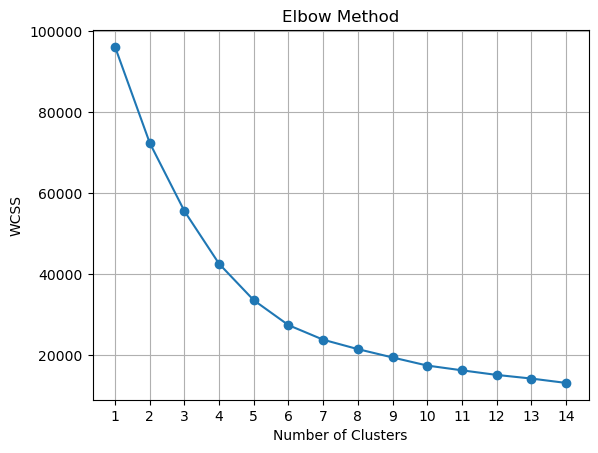

In [11]:
# Selecting the columns for clustering
selected_columns = ['avg_stay_duration_in_days', 'total_hotels_booked', 'total_flights_booked', 'checked_bags', 'cancellation', 'scaled_ads_per_km']
X = data[selected_columns]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = [] # Within-cluster sum of squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

In [12]:
wcss_values = {f"Cluster {i+1}": wcss_val for i, wcss_val in enumerate(wcss)}
wcss_values

{'Cluster 1': 96089.9999999993,
 'Cluster 2': 72355.55353095247,
 'Cluster 3': 55513.74622055881,
 'Cluster 4': 42488.72137596371,
 'Cluster 5': 33487.80138617567,
 'Cluster 6': 27341.334616237094,
 'Cluster 7': 23743.72515656253,
 'Cluster 8': 21413.537650760707,
 'Cluster 9': 19354.087868578776,
 'Cluster 10': 17356.573777871818,
 'Cluster 11': 16179.229946207626,
 'Cluster 12': 15045.943989357569,
 'Cluster 13': 14146.000860566624,
 'Cluster 14': 13065.223775401544}

In [13]:
# Fitting K-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Displaying the first few rows with the added cluster labels
data.head()

,trip_id,user_id,age,gender,married,has_children,home_country,date_booked,flight_discount_offered,hotel_discount_offered,cancellation,checked_bags,avg_stay_duration_in_days,total_hotels_booked,total_hotel_paid_after_discount,total_flights_booked,total_base_fare_after_discount,scaled_ads_per_km,Cluster
0,498665-edfd44713827465f9682087586fb6a31,498665,35,Female,0,0,canada,2023-03-25,2.0,1.0,1.0,2,1.0,2.0,182.0,2.0,426.96,17.921574,1
1,545089-33b20054dbcd4702a9ba2731eb2e75a8,545089,16,Female,0,0,usa,2023-04-15,1.0,1.0,1.0,0,10.0,2.0,136.0,2.0,2283.96,0.000000,1
2,537413-d4000260e103428dad845b014f6289f8,537413,47,Female,1,0,canada,2023-07-22,1.0,1.0,1.0,2,4.0,2.0,336.0,2.0,162.26,0.000000,1
3,509645-2b8b0f5d8bc0427c983e0a729a5a5ac2,509645,53,Male,1,0,usa,2023-02-05,1.0,1.0,1.0,0,4.0,2.0,358.0,2.0,669.84,0.000000,1
4,182191-de32473e56244ac3bed8490f76398b2f,182191,18,Female,0,1,usa,2023-01-05,1.0,1.0,1.0,1,0.0,1.0,NaN,1.0,537.67,0.000000,1


In [14]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print("The average silhouette score is:", silhouette_avg)


The average silhouette score is: 0.5535207065842169


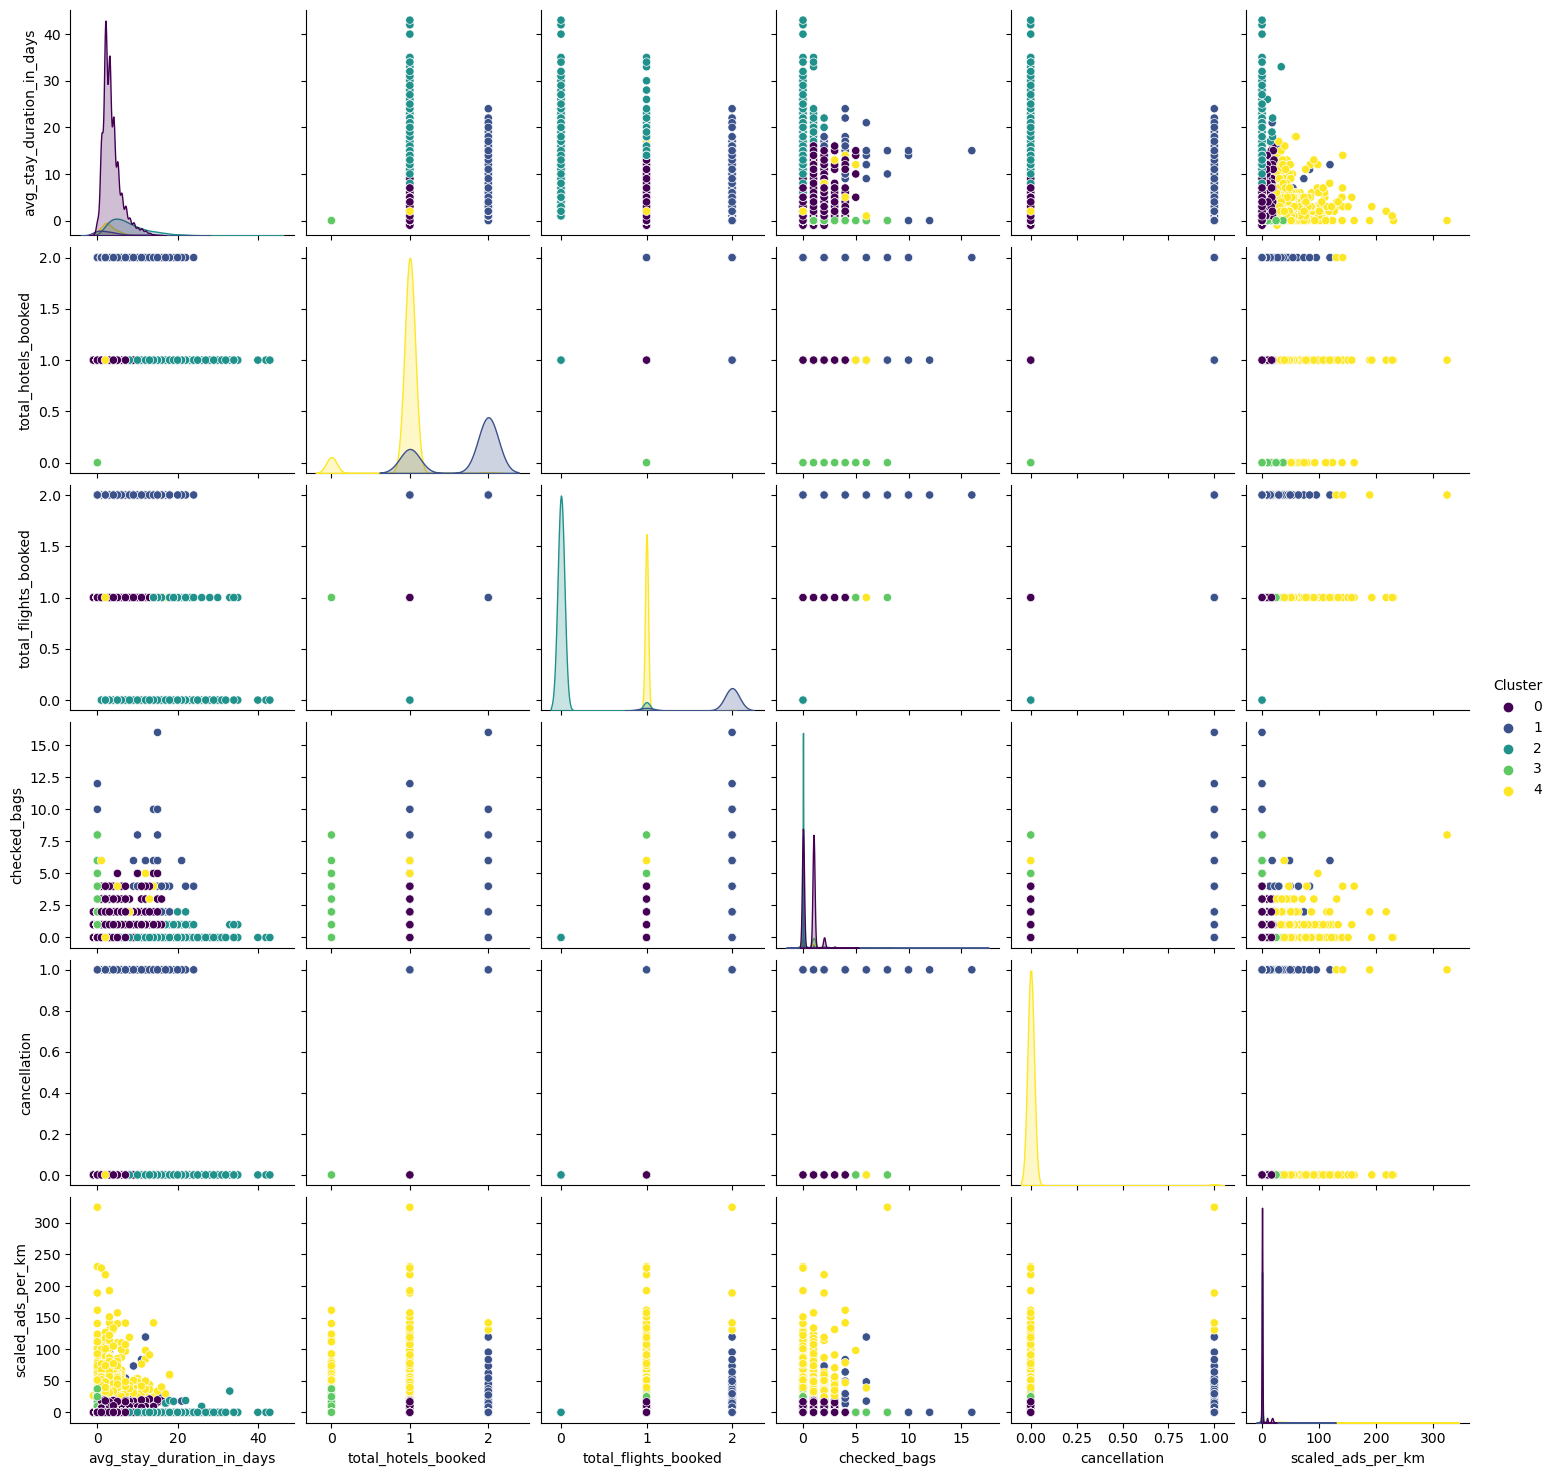

In [15]:
# Selecting the columns to visualize, including the 'Cluster' column
selected_columns = columns_to_fill + ['Cluster']

# Pairwise scatter plots
sns.pairplot(data[selected_columns], hue='Cluster', palette='viridis')

plt.show()

In [16]:
# Grouping the data by cluster and calculating the mean for each cluster
cluster_summary = data.groupby('Cluster')[columns_to_fill].mean()
cluster_summary

,avg_stay_duration_in_days,total_hotels_booked,total_flights_booked,checked_bags,cancellation,scaled_ads_per_km
Cluster,,,,,,
0,3.515593,1.000000,1.000000,0.568195,0.000000,1.150780
1,4.325704,1.698944,1.899648,1.471831,1.000000,3.579488
2,8.030718,1.000000,0.036945,0.012038,0.000000,0.053523
3,0.000000,0.000000,1.000000,0.607562,0.000000,2.444100
4,3.304196,0.933566,1.004662,0.592075,0.004662,45.635041


- Cluster 0:
    - Characteristics: Short stays, both hotels and flights booked, some checked bags, no cancellations, low absolute distance scaling.
    - Potential Segment: "Short Stay Travelers."
    - Possible Incentive: 1 night free hotel with flights.
- Cluster 1:
    - Characteristics: Moderate stays, more hotels and flights booked, more checked bags, cancellations observed, moderate absolute distance scaling.
    - Potential Segment: "Frequent Travelers with Cancellations."
    - Possible Incentive: No cancellation fees or free checked bag.
- Cluster 2:
    - Characteristics: Longer stays, mainly hotels booked, minimal flights, minimal checked bags, no cancellations, very low absolute distance scaling.
    - Potential Segment: "Long Stay Hotel Guests."
    - Possible Incentive: Free hotel meal.
- Cluster 3:
    - Characteristics: No hotel stays, only flights booked, some checked bags, no cancellations, moderate absolute distance scaling.
    - Potential Segment: "Flight-Only Customers."
    - Possible Incentive: Exclusive discounts on flights.
- Cluster 4:
    - Characteristics: Short stays, slightly fewer hotels than flights booked, some checked bags, minimal cancellations, very high absolute distance scaling.
    - Potential Segment: "Big Flight Spenders."
    - Possible Incentive: Exclusive discounts or free checked bag.

In [18]:
# Creating a mapping between cluster numbers and descriptions
cluster_mapping = {
    0: 'Short Stay Travelers',
    1: 'Frequent Travelers with Cancellations',
    2: 'Long Stay Hotel Guests',
    3: 'Flight-Only Customers',
    4: 'Big Flight Spenders'
}

# Replacing the cluster labels with the corresponding descriptions in the 'Cluster' column
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Displaying the first few rows with the updated cluster labels
data.head()

,trip_id,user_id,age,gender,married,has_children,home_country,date_booked,flight_discount_offered,hotel_discount_offered,cancellation,checked_bags,avg_stay_duration_in_days,total_hotels_booked,total_hotel_paid_after_discount,total_flights_booked,total_base_fare_after_discount,scaled_ads_per_km,Cluster
0,498665-edfd44713827465f9682087586fb6a31,498665,35,Female,0,0,canada,2023-03-25,2.0,1.0,1.0,2,1.0,2.0,182.0,2.0,426.96,17.921574,Frequent Travelers with Cancellations
1,545089-33b20054dbcd4702a9ba2731eb2e75a8,545089,16,Female,0,0,usa,2023-04-15,1.0,1.0,1.0,0,10.0,2.0,136.0,2.0,2283.96,0.000000,Frequent Travelers with Cancellations
2,537413-d4000260e103428dad845b014f6289f8,537413,47,Female,1,0,canada,2023-07-22,1.0,1.0,1.0,2,4.0,2.0,336.0,2.0,162.26,0.000000,Frequent Travelers with Cancellations
3,509645-2b8b0f5d8bc0427c983e0a729a5a5ac2,509645,53,Male,1,0,usa,2023-02-05,1.0,1.0,1.0,0,4.0,2.0,358.0,2.0,669.84,0.000000,Frequent Travelers with Cancellations
4,182191-de32473e56244ac3bed8490f76398b2f,182191,18,Female,0,1,usa,2023-01-05,1.0,1.0,1.0,1,0.0,1.0,NaN,1.0,537.67,0.000000,Frequent Travelers with Cancellations


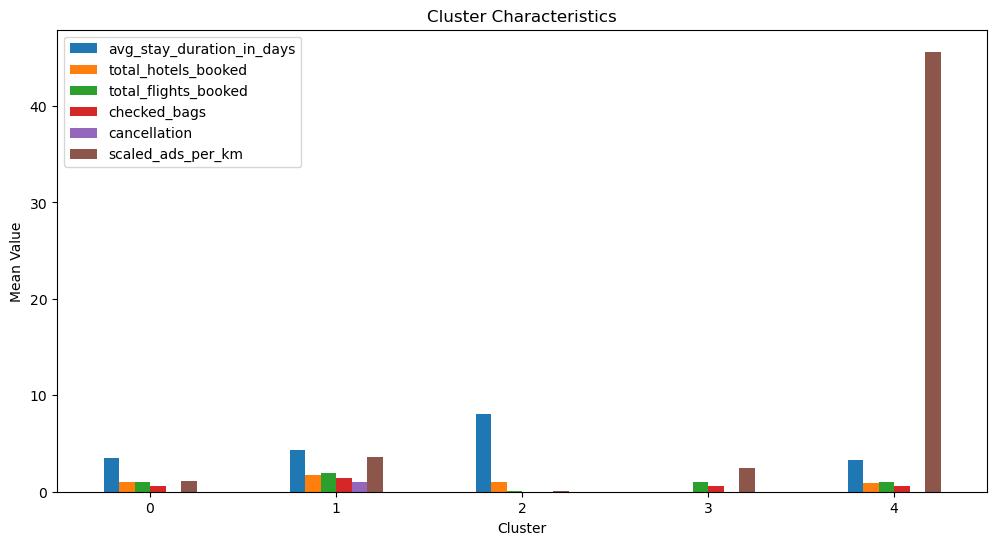

In [19]:
# Plotting the mean values for each cluster
cluster_summary.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Cluster Characteristics')
plt.ylabel('Mean Value')
plt.show()

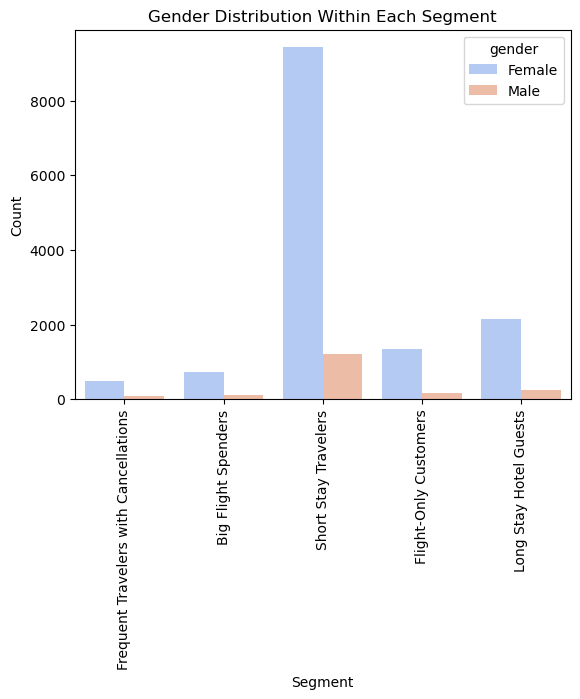

In [20]:
# Creating a bar plot to show the count of males and females within each segment
sns.countplot(x='Cluster', hue='gender', data=data, palette='coolwarm')
plt.title('Gender Distribution Within Each Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.show()

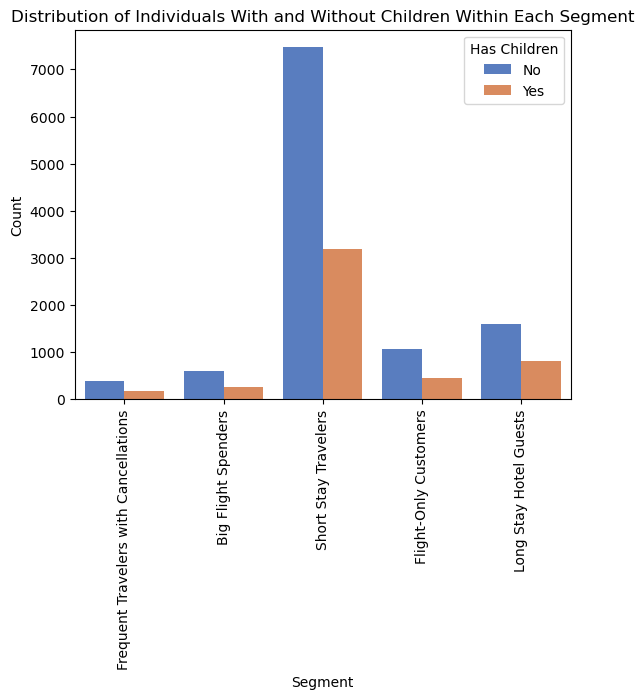

In [21]:
# Creating a bar plot to show the distribution of individuals with and without children within each segment
sns.countplot(x='Cluster', hue='has_children', data=data, palette='muted')
plt.title('Distribution of Individuals With and Without Children Within Each Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.legend(title='Has Children', labels=['No', 'Yes'])
plt.show()


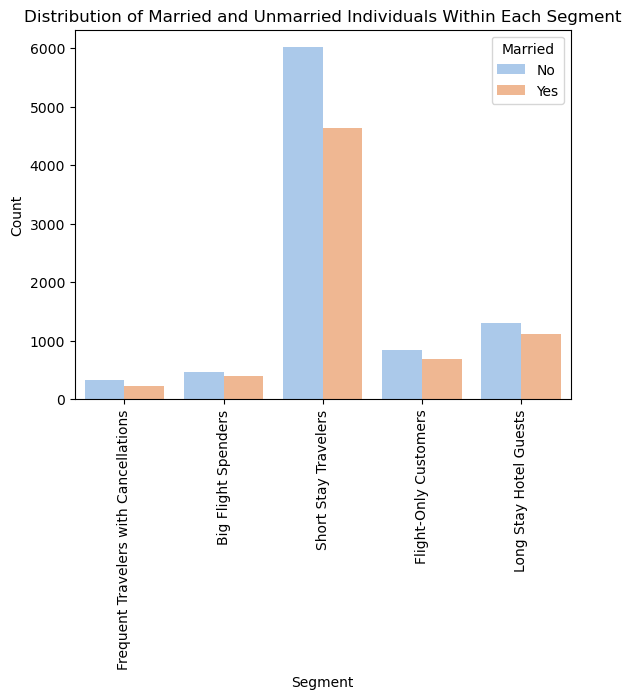

In [22]:
# Creating a bar plot to show the distribution of married and unmarried individuals within each segment
sns.countplot(x='Cluster', hue='married', data=data, palette='pastel')
plt.title('Distribution of Married and Unmarried Individuals Within Each Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.legend(title='Married', labels=['No', 'Yes'])
plt.show()

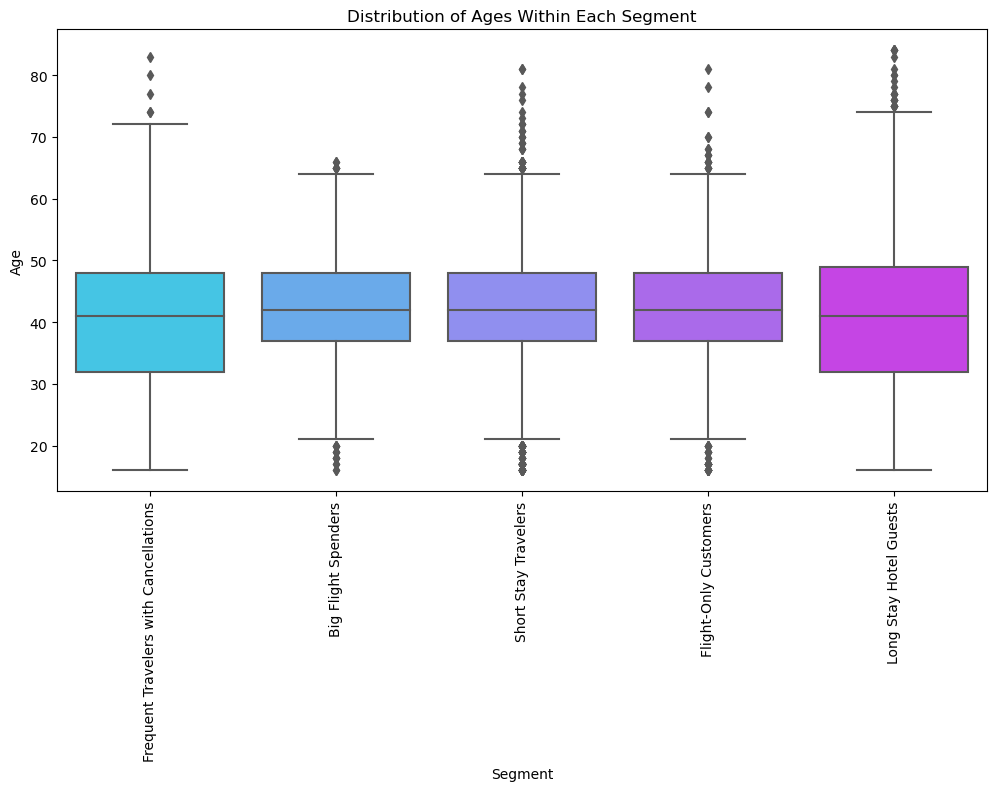

In [23]:
# Creating a box plot to show the distribution of ages within each segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='age', data=data, palette='cool')
plt.title('Distribution of Ages Within Each Segment')
plt.ylabel('Age')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Adding the two columns to create a new column 'total_paid_usd'
data['total_paid_usd'] = data['total_hotel_paid_after_discount'] + data['total_base_fare_after_discount']

# Displaying the first few rows to verify the new column
data.head()


,trip_id,user_id,age,gender,married,has_children,home_country,date_booked,flight_discount_offered,hotel_discount_offered,cancellation,checked_bags,avg_stay_duration_in_days,total_hotels_booked,total_hotel_paid_after_discount,total_flights_booked,total_base_fare_after_discount,scaled_ads_per_km,Cluster,total_paid_usd
0,498665-edfd44713827465f9682087586fb6a31,498665,35,Female,0,0,canada,2023-03-25,2.0,1.0,1.0,2,1.0,2.0,182.0,2.0,426.96,17.921574,Frequent Travelers with Cancellations,608.96
1,545089-33b20054dbcd4702a9ba2731eb2e75a8,545089,16,Female,0,0,usa,2023-04-15,1.0,1.0,1.0,0,10.0,2.0,136.0,2.0,2283.96,0.000000,Frequent Travelers with Cancellations,2419.96
2,537413-d4000260e103428dad845b014f6289f8,537413,47,Female,1,0,canada,2023-07-22,1.0,1.0,1.0,2,4.0,2.0,336.0,2.0,162.26,0.000000,Frequent Travelers with Cancellations,498.26
3,509645-2b8b0f5d8bc0427c983e0a729a5a5ac2,509645,53,Male,1,0,usa,2023-02-05,1.0,1.0,1.0,0,4.0,2.0,358.0,2.0,669.84,0.000000,Frequent Travelers with Cancellations,1027.84
4,182191-de32473e56244ac3bed8490f76398b2f,182191,18,Female,0,1,usa,2023-01-05,1.0,1.0,1.0,1,0.0,1.0,NaN,1.0,537.67,0.000000,Frequent Travelers with Cancellations,NaN


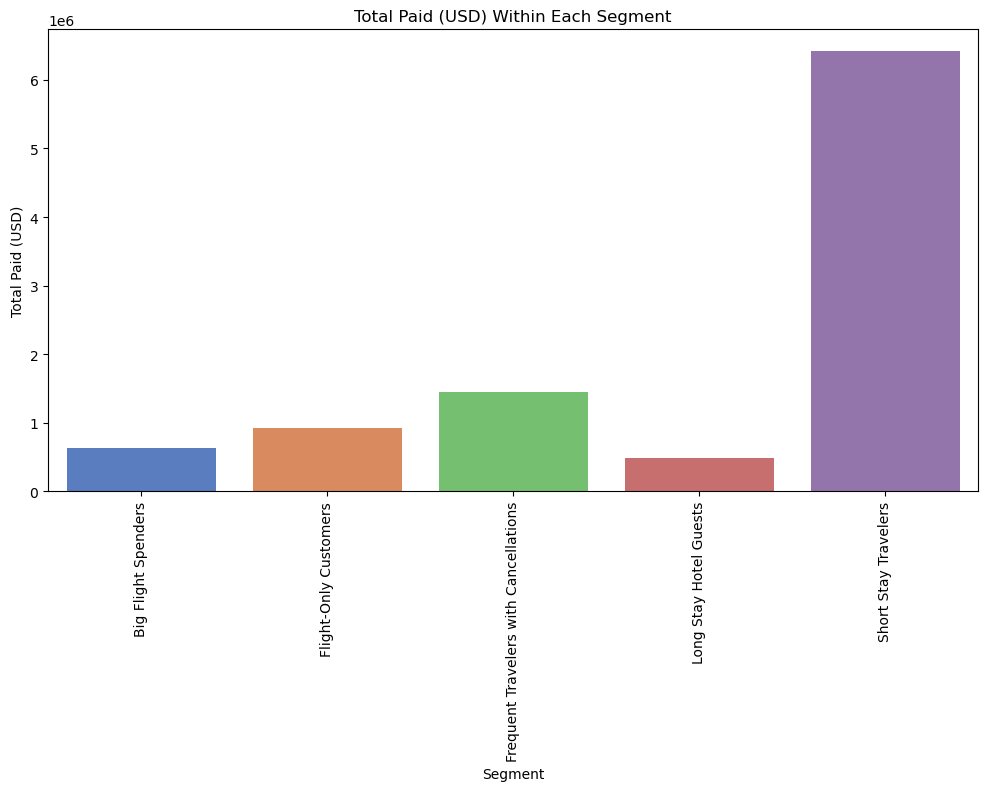

In [25]:
# Calculating the total sum of 'total_paid_usd' for each cluster
total_spending_per_cluster = data.groupby('Cluster')['total_paid_usd'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='total_paid_usd', data=total_spending_per_cluster, palette='muted')
plt.title('Total Paid (USD) Within Each Segment')
plt.ylabel('Total Paid (USD)')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.show()


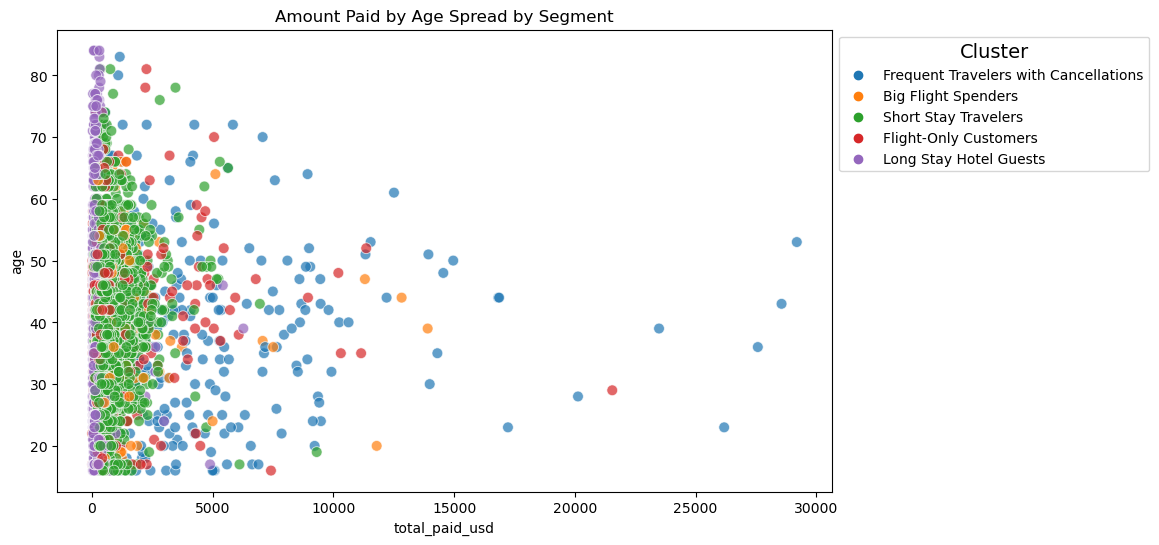

In [28]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=data, x='total_paid_usd', y='age', hue='Cluster', palette='tab10', s=60, alpha=0.7, legend='full')
plt.title("Amount Paid by Age Spread by Segment")

# Legend
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Cluster')  # Move legend to the left
legend.get_title().set_fontsize('14')  

plt.show()